In [1]:
from typing_extensions import TypedDict
from langgraph.graph import StateGraph, START, END
from IPython.display import Image, display
from langchain_community.chat_models.tongyi import ChatTongyi

llm = ChatTongyi( # type: ignore
    model="qwen3-8b", # 这里用qwen3-0.6b似乎不支持structed_llm
    model_kwargs={
        "temperature": 0.0,
        "enable_thinking": False,
    },
)

In [2]:

# Graph state
class State(TypedDict):
    topic: str
    joke: str
    story: str
    poem: str
    combined_output: str


# Nodes
def call_llm_1(state: State):
    """First LLM call to generate initial joke"""

    msg = llm.invoke(f"Write a joke about {state['topic']} in chinese")
    return {"joke": msg.content}


def call_llm_2(state: State):
    """Second LLM call to generate story"""

    msg = llm.invoke(f"Write a story about {state['topic']} in chinese")
    return {"story": msg.content}


def call_llm_3(state: State):
    """Third LLM call to generate poem"""

    msg = llm.invoke(f"Write a poem about {state['topic']} in chinese")
    return {"poem": msg.content}


def aggregator(state: State):
    """Combine the joke and story into a single output"""

    combined = f"Here's a story, joke, and poem about {state['topic']}!\n\n"
    combined += f"STORY:\n{state['story']}\n\n"
    combined += f"JOKE:\n{state['joke']}\n\n"
    combined += f"POEM:\n{state['poem']}"
    return {"combined_output": combined}


# Build workflow
parallel_builder = StateGraph(State)

# Add nodes
parallel_builder.add_node("call_llm_1", call_llm_1)
parallel_builder.add_node("call_llm_2", call_llm_2)
parallel_builder.add_node("call_llm_3", call_llm_3)
parallel_builder.add_node("aggregator", aggregator)

# Add edges to connect nodes
parallel_builder.add_edge(START, "call_llm_1")
parallel_builder.add_edge(START, "call_llm_2")
parallel_builder.add_edge(START, "call_llm_3")
parallel_builder.add_edge("call_llm_1", "aggregator")
parallel_builder.add_edge("call_llm_2", "aggregator")
parallel_builder.add_edge("call_llm_3", "aggregator")
parallel_builder.add_edge("aggregator", END)
parallel_workflow = parallel_builder.compile()


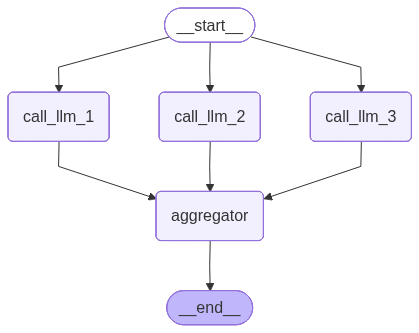

In [3]:
# Show workflow
display(Image(parallel_workflow.get_graph().draw_mermaid_png()))

In [4]:
# Invoke
state = parallel_workflow.invoke({"topic": "cats"})
print(state["combined_output"])

Here's a story, joke, and poem about cats!

STORY:
**《猫的传说》**

在遥远的东方，有一座被群山环绕的小村庄，名叫“青溪村”。这里四季如春，溪水潺潺，村民们以种田为生，生活平静而安宁。然而，在这片宁静的土地上，流传着一个关于猫的古老传说。

相传，很久以前，村里有一位老妇人，名叫李婆婆。她一生孤独，只养了一只黑猫，名叫“墨影”。墨影不仅聪明伶俐，还拥有神奇的力量——它能听懂人语，也能预知未来。

有一天，村中突然传来消息：山中出现了一只凶猛的野兽，吞噬了许多村民的牲畜，甚至有人失踪。村民们惊恐万分，纷纷逃往山下。李婆婆却坚定地说：“别怕，我有办法。”

她带着墨影走进了山林。一路上，墨影用它的力量感知到了野兽的踪迹。原来，那不是普通的野兽，而是一只被诅咒的灵猫，因前世的怨念而化作恶灵，游荡在山中。

墨影鼓起勇气，与恶灵对峙。它用尽全力，唤醒了沉睡在山中的古老神力。最终，恶灵被净化，化作一缕轻烟消散在风中。山林恢复了平静，村民们的恐惧也渐渐平息。

从那以后，墨影成了村里的守护者。每当有危险来临，它都会及时提醒村民。人们开始敬重猫，不再将它们视为普通的动物，而是视其为神灵的使者。

多年后，李婆婆去世，墨影也悄然离去。但它的传说却一直流传至今。每逢月圆之夜，村民们会点燃香火，向山中献上祭品，祈求猫神的庇佑。

如今，青溪村依旧宁静，而那只神秘的黑猫，仿佛仍在山林深处，默默守护着这片土地。

---

**《The Legend of the Cats》**

In a remote village called Qingxi, surrounded by mountains and rivers, there lived an old woman named Li Grandma. She raised a black cat named "Mo Ying," who could understand human speech and even foresee the future.

One day, a fierce beast appeared in the mountains, devouring livestock and even taking people missing. The village